<a href="https://colab.research.google.com/github/joanarepinaldo/airbnb_iItaly/blob/main/Airbnb_Veneza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/joanarepinaldo/arquivos/main/logo1.jpg">](https://www.linkedin.com/in/joana-pereira-repinaldo-3368b7116/)

---

# Análise dos Dados do Airbnb - Veneza - Itália

O **[Airbnb](https://www.airbnb.com.br/)** surgiu em 2007 e já conta com mais de **4 milhões** de anfitriões e está presente em **220 países** e regiões. Unindo pessoas que procuraram acomodações e experiências únicas com anfitriões que anunciam seus espaços de maneira simples e prática. Devido a forma criativa e inovadora o **Airbnb** já hospedou 1 bilhão de hospedes ao redor do mundo e estes números tendem a crescer.


Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) conseguimos obter uma grande quantidade de dados para análise e desenvolvimento de soluções de *Data Science*. Para nossa análise foi escolhida a cidade de **Veneza** localizada na Itália, pois é uma das cidades turísticas mais visitas da Itália, conhecida em nível internacional pelas suas belezas históricas, artísticas e panorâmicas, sendo um dos destinos europeus mais procurados pelos turistas.

<center><img width="50%" src="https://raw.githubusercontent.com/joanarepinaldo/arquivos/main/image.png"></center>

Este projeto faz uma análise dos dados referentes a cidade de Veneza na Itália com o objetivo de apresentar insights de hospedagem para a tomada de decisão dos viajantes.






## Configurando o ambiente de trabalho
----
Utilizamos as bibliotecas Pandas, Matplotlib, Seaborn e Numpy para manipular os dados e extrair as informações desejadas, além de facilitar a visualização desses dados.

In [281]:
# importar os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Obtenção dos Dados
---
A base de dados utilizada neste projeto pode ser obtida no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), buscando as cidade *Venice*. 

Será utilizada a versão simplificada :
* `listings.csv` - *Summary information and metrics).*

**Importante**: Pensando na possibilidade dos dados não estarem mais disponíveis pelo portal, o que quebraria nosso código, disponibilizo [aqui](https://raw.githubusercontent.com/joanarepinaldo/airbnb_iItaly/main/venice.csv) o conjunto de dados utilizado neste projeto.

In [176]:
# importar o arquivo csv
df = pd.read_csv("https://raw.githubusercontent.com/joanarepinaldo/airbnb_iItaly/main/venice.csv")


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - o grupo de bairro geocodificado usando a latitude e longitude
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` — úmero de reviews da lista nos últimos 12 meses
* `license` — número de licença


In [177]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,225,3,163,2019-06-26,1.52,3,364,1,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,213,4,64,2016-07-17,0.66,3,357,0,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,122,4,186,2021-10-20,1.52,3,351,2,NaN
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,193,1,412,2021-10-16,3.29,2,201,2,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,280,2,81,2021-08-24,1.42,1,289,9,NaN


In [178]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos de entradas do dataset
display(df.dtypes)

Entradas:	 7370
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## Tratamento dos Dados
---
Antes de realizar a análise dos dados precisamos realizar um tratamento do mesmo, tratando os dados discrepantes e faltates.

In [179]:
# porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.840841
reviews_per_month                 0.127680
last_review                       0.127680
host_name                         0.002307
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

* A variável `license` possui a maior porcentagem de valores ausentes.Esta variável representa a licença do imóvel, informação que não é relevante para essa análise, deste modo será eliminada do dataset.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 12,77%. As informações da coluna `last_review` são irrelevantes para o objetivo deste projeto. Portanto, essa coluna será excluída da base de dados.
* A variável `host_name` apresenta uma pequena porcetagem de valores ausentes(0,23%). Estes dados não serão alterados, pois não impactam na análise.



In [180]:
# eliminar colunas 
df.drop(columns=['license'], inplace=True)
df.drop(columns=['last_review'], inplace=True)

A variável `reviews_per_month`representa a quantidade de reviews por mês e conforme visto possue 12,77% de valores nulos. Com isto, será feito o preenchimento destes valores pela mediana.

In [181]:
# preencher valores ausentes com a mediana
df = df.fillna({"reviews_per_month": df.reviews_per_month.median()})

**Distribuição das variáveis numéricas**



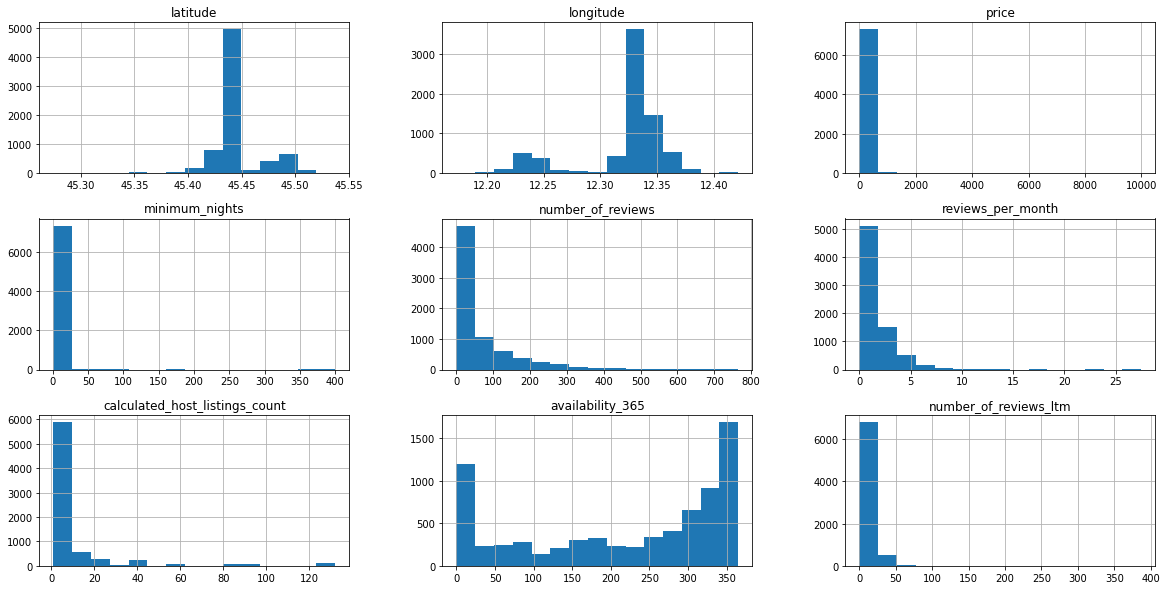

In [182]:
#colunas com variáveis numéricas
columns_num=df.iloc[:, 3:17].select_dtypes(include=np.number or np.floating).columns.tolist()

#histograma das variáveis numéricas
df[columns_num].hist(bins=15, figsize=(20,10));

In [183]:
# resumo estatístico das variáveis numéricas
df[columns_num].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000
mean,45.444376,12.320997,138.226323,2.458345,63.365129,1.631442,10.413840,217.012890,7.358480
std,0.023370,0.039068,265.954523,8.497872,91.785263,1.609431,22.540107,132.458323,12.506136
min,45.274390,12.173216,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,45.434213,12.323552,71.000000,1.000000,4.000000,0.550000,1.000000,89.000000,0.000000
50%,45.438080,12.331470,100.000000,2.000000,24.000000,1.200000,3.000000,267.000000,2.000000
75%,45.444120,12.340012,145.000000,3.000000,86.000000,2.170000,7.000000,338.000000,10.000000
max,45.537350,12.421370,9999.000000,400.000000,765.000000,27.500000,132.000000,365.000000,387.000000


Pela distribuição do histograma e com base nos dados estatísticos, percebe-se indícios da presença de *outliers*. Por exemplo:
* A variável `minimum_nights` possui 75% do valor entre 3 noites, porém seu valor máximo é de 400 (1 anos e 35 dias).
* A variável `price` tem valor mínimo em 0, esta variável representa o preço para alugar o imóvel. Apresentando 75% dos valores abaixo de 145 e com valor máximo estando em 9999.



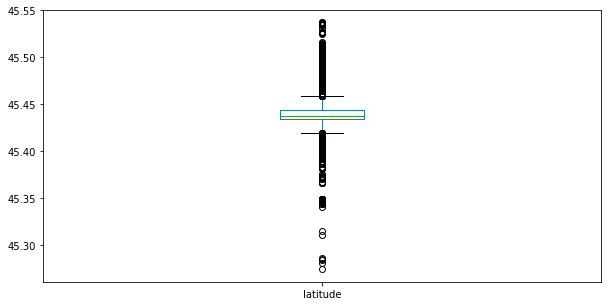

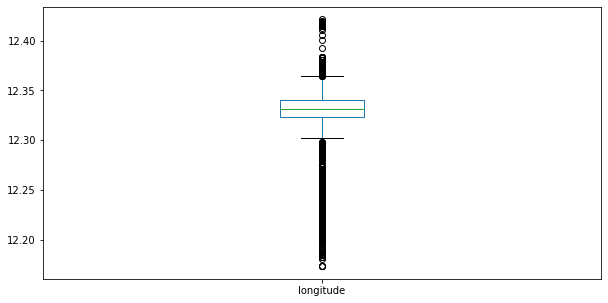

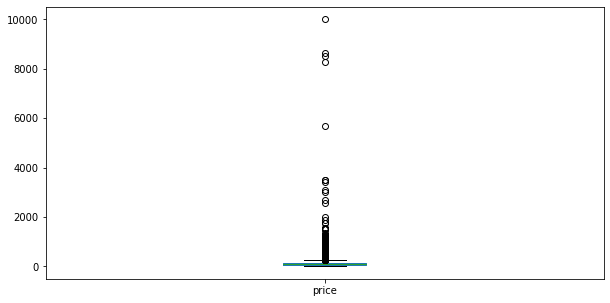

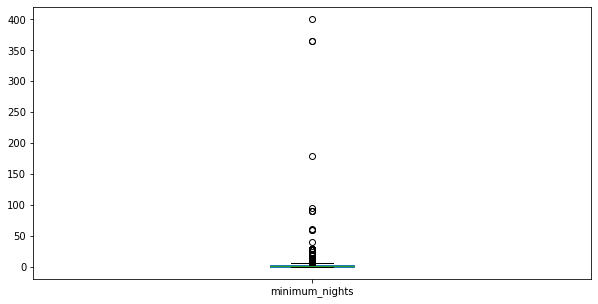

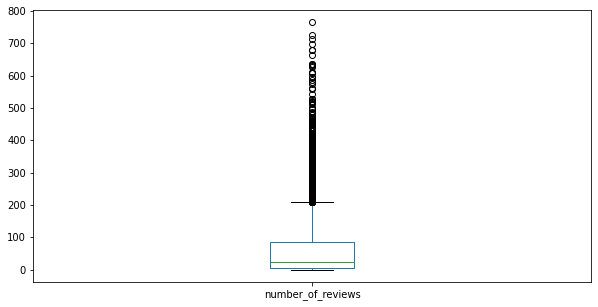

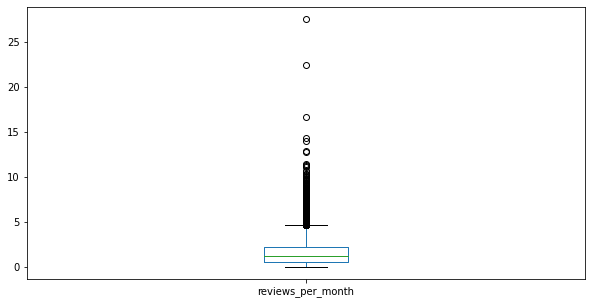

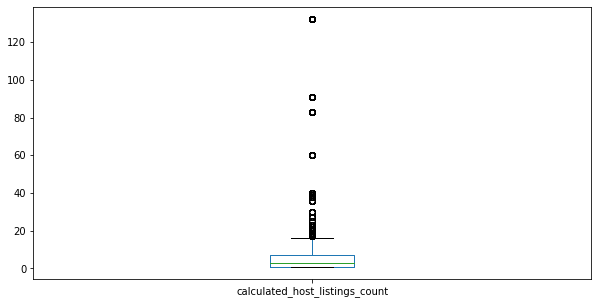

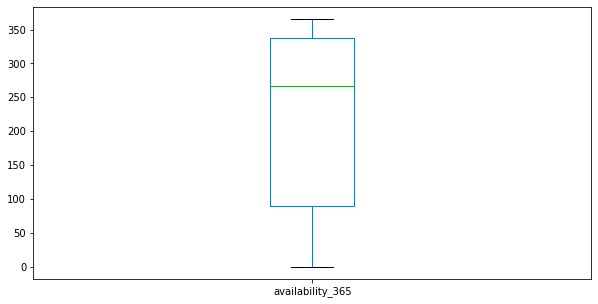

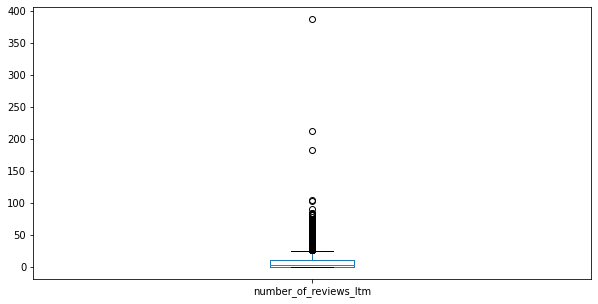

In [184]:
# boxplot das variáveis numéricas
for col in columns_num: 
    plt.figure()  
    df[col].plot(kind='box', figsize=(10, 5)) 
  

In [185]:
# ver quantidade dos valores para cada coluna com outlier
print("minimum_nights: valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%\n\n".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

print("price: valores acima de 2000:")
print("{} entradas".format(len(df[df.price> 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

minimum_nights: valores acima de 30 dias:
12 entradas
0.1628%


price: valores acima de 2000:
12 entradas
0.1628%


**Limpeza dos dados**

Remoção dos *outliers* pelo Intervalo Interquartil:

* Definir o limite superior e inferior com base no terceiro e primeiro quartil, ou seja, valores fora deste intervalo serão considerados *outliers*.

Para a variável `price` será utilizado o limite inferior igual a zero, pois não existe um preço para locação negativo. 

In [186]:
# definindo os limites para a variável price
Q1 = df.price.quantile(.25)
Q3 = df.price.quantile(.75)
IQR = Q3 - Q1
sup_price = Q3 + 1.5 * IQR
inf_price = Q1 - 1.5 * IQR
print('Limite superior de price: {}'.format(sup_price))
print('Limite iferior de price: {}\n\n'.format(inf_price))

# definindo os limites para a variável minimum_nights
Q1 = df.minimum_nights.quantile(.25)
Q3 = df.minimum_nights.quantile(.75)
IQR = Q3 - Q1
sup_nights = Q3 + 1.5 * IQR
print('Limite superior de minimum_nights: {}'.format(sup_nights))

Limite superior de price: 256.0
Limite iferior de price: -40.0


Limite superior de minimum_nights: 6.0


Para a variavél `minimum_nights` será utilizado o limite arbitrário, visto que podem ocorrer de uma pessoa locar um imovel por mais de 6 noites.

In [187]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights >30].index, axis=0, inplace=True)

print(f'Dataset antes da limpeza: {df.shape[0]}')
print(f'Dataset após da limpeza: {df_clean.shape[0]}')
print(f'Os outlies eliminados representam {((df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100):.2f}% do dataset')

Dataset antes da limpeza: 7370
Dataset após da limpeza: 7343
Os outlies eliminados representam 0.37% do dataset



## Análise dos Dados
-----
Com os dados devidamente tratados chegou a hora de extrair as principais características e informações presentes nesses dados.


**Correlação existente entre as variáveis**


In [188]:
# criar uma matriz de correlação
corr = df_clean[columns_num].corr()

display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,-0.772175,-0.216012,-0.101204,0.038760,0.058171,-0.062507,-0.008647,0.000946
longitude,-0.772175,1.000000,0.203483,0.080487,-0.027113,-0.055234,0.050692,0.041304,0.010784
price,-0.216012,0.203483,1.000000,0.042883,-0.150428,-0.152705,0.148620,0.057081,-0.148142
minimum_nights,-0.101204,0.080487,0.042883,1.000000,-0.036962,-0.088829,-0.040073,-0.035195,-0.087384
number_of_reviews,0.038760,-0.027113,-0.150428,-0.036962,1.000000,0.628478,-0.157583,-0.000561,0.481606
reviews_per_month,0.058171,-0.055234,-0.152705,-0.088829,0.628478,1.000000,-0.128618,0.022739,0.696314
calculated_host_listings_count,-0.062507,0.050692,0.148620,-0.040073,-0.157583,-0.128618,1.000000,0.122963,-0.088092
availability_365,-0.008647,0.041304,0.057081,-0.035195,-0.000561,0.022739,0.122963,1.000000,0.079350
number_of_reviews_ltm,0.000946,0.010784,-0.148142,-0.087384,0.481606,0.696314,-0.088092,0.079350,1.000000


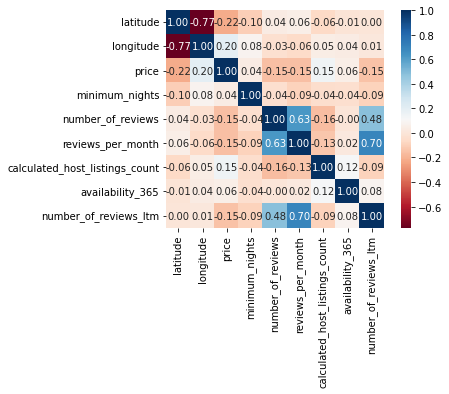

In [189]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Através do heatmap percebe-se que a `longitude` possui uma correlação positiva com `price`, isto significa que o preço tende a aumentar conforme a longitude, o inverso acontece com a `latide` que possui uma correlação negativa. O gráfico mostrou também que há correlação entre as variáveis `number_of_reviews`, `number_of_reviews_ltm` e `reviews_per_month`,visto que ambas as variáveis mostram a quantidade de reviews das acomodações. 

**Tipo de imóvel mais alugado no Airbnb da Itália**

Text(0, 0.5, 'Tipo de Imóvel')

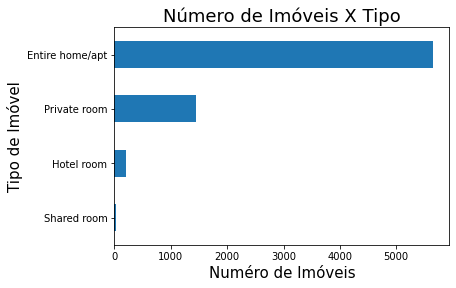

In [190]:
# gráfico de barras tipo de imóveis 
df_room_type = df_clean.room_type.value_counts(ascending=True)
ax = df_room_type.plot.barh()
plt.title('Número de Imóveis X Tipo', fontsize=18)
plt.xlabel('Numéro de Imóveis', fontsize=15)
plt.ylabel('Tipo de Imóvel', fontsize=15)


In [191]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.770530
Private room       0.197739
Hotel room         0.027918
Shared room        0.003813
Name: room_type, dtype: float64

In [192]:
# preço por tipo de imóveis 
df_clean.groupby(['room_type']).price.mean().sort_values(ascending= False)

room_type
Entire home/apt    141.403499
Hotel room         135.326829
Private room        86.473829
Shared room         45.500000
Name: price, dtype: float64

O Airbnb oferece quatro categorias de imóvel em Veneza:

* Casa/Apartamento inteiro - 76,16%
* Quarto Privado - 20,67%
*  Quarto de Hotel - 2,76%
* Quarto Compartilhado - 0,41%

Logo chega-se a conclusão que em uma viagem para Veneza com a intenção de se hospedar em um quarto compartilhado seriam poucas opções disponivéis no Airbnb.

**Localização em Veneza**

In [193]:
# 10 regiões com maior número de anúncios
df_size=df_clean.groupby('neighbourhood').size().sort_values(ascending = False)
df_size[:10]

neighbourhood
Cannaregio                1427
Castello                  1403
San Marco                  944
San Polo                   567
Santa Croce                554
Dorsoduro                  554
Piave 1860                 481
Lido                       330
San Lorenzo XXV Aprile     147
Marghera                   130
dtype: int64

As regiões - *Cannaregio, Castello e San Marco* - com maior anúncios são localizadas no centro da ilha e possuem pontos turísticos.
<center><img width="50%" src="https://h8f7z4t2.stackpathcdn.com/wp-content/uploads/2016/03/veneza_revistaviagem_mapa-2.jpg"><center>

In [194]:
# 10 regiões com maior número de reviews
df_reviews=df_clean.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)
df_reviews[:10]

neighbourhood
Cannaregio                105743
Castello                   87733
San Marco                  58082
Santa Croce                38350
Dorsoduro                  38102
San Polo                   37392
Piave 1860                 30916
Marghera                   11627
Lido                        8658
San Lorenzo XXV Aprile      8120
Name: number_of_reviews, dtype: int64

In [195]:
# preço medio de Veneza
print('Preço medio para se hospedar em veneza: {:.2f}\n\n'.format(df_clean.price.mean()))

# preço medio por regiao
print('Regiões mais caras:')
df_price=df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)
print(df_price[:5])

print('\n\nRegiões mais baratas:')
print(df_price[-5:].sort_values(ascending=True))

Preço medio para se hospedar em veneza: 130.01


Regiões mais caras:
neighbourhood
Alberoni             206.314286
Isola San Giorgio    200.000000
San Marco            185.911017
Tronchetto           176.750000
San Polo             156.449735
Name: price, dtype: float64


Regiões mais baratas:
neighbourhood
Giustizia       30.000000
Malcontenta     42.500000
Torre Antica    45.000000
Cipressina      49.000000
Zelarino        49.666667
Name: price, dtype: float64


In [196]:
# tipo de imovel por região
df_type=df_clean.groupby(['room_type']).neighbourhood.value_counts(ascending=False)
for x in df_clean.room_type.unique():
  print(x,'\n',df_type[x][:5],'\n')
  

Entire home/apt 
 neighbourhood
Castello      1183
Cannaregio    1099
San Marco      780
San Polo       477
Dorsoduro      470
Name: neighbourhood, dtype: int64 

Private room 
 neighbourhood
Cannaregio     281
Piave 1860     232
Castello       183
Santa Croce    126
San Marco      117
Name: neighbourhood, dtype: int64 

Hotel room 
 neighbourhood
Cannaregio    45
San Marco     45
Castello      32
Piave 1860    16
Dorsoduro     12
Name: neighbourhood, dtype: int64 

Shared room 
 neighbourhood
Castello      5
Marghera      3
Piave 1860    3
Cannaregio    2
Dorsoduro     2
Name: neighbourhood, dtype: int64 



In [208]:
# comparando os dados
df_comp=pd.concat([df_price, df_reviews, df_size], axis=1)
df_comp.columns=['Preço','Reviews','Quantidade de Imóveis']
df_comp.sort_values(by=['Preço','Quantidade de Imóveis', 'Reviews'],ascending=False)

,Preço,Reviews,Quantidade de Imóveis
Alberoni,206.314286,99,35
Isola San Giorgio,200.000000,0,1
San Marco,185.911017,58082,944
Tronchetto,176.750000,26,4
San Polo,156.449735,37392,567
Dorsoduro,156.021661,38102,554
Lido,140.021212,8658,330
Torcello,140.000000,62,2
Villabona,138.800000,30,5
Castello,135.443336,87733,1403


* Isola San Giorgio é uma das região mais cara da cidade,porem apresenta uma unica locação de uma casa/apartamento inteiro.
* San Marco é uma das regiões com maiores anúncios e mais cara para se hospedar, contando com os quatros tipos de acomodação.
* Castello e Cannaregio possuem preço médio de hospedagem próximo a média de Veneza, além de possuir diversas opções de acomodações.
* Uma das regiões que possuem um preço mais baixo e está entre as 10 regiões com maior número de anúncios e acomodações é Marghera.


In [219]:
# nome acomodações mais caras
df_clean[['name','neighbourhood','price','number_of_reviews']].sort_values(by=['price','number_of_reviews'],ascending=False)[:10]

,name,neighbourhood,price,number_of_reviews
134,Charming Apartment with gran canal view in Rialto,San Polo,2000,342
6576,Appealing Double Or Twin Run Of House At Venezia,San Marco,1861,0
5805,Celestina,San Polo,1767,1
3984,Capannone Redentore,Giudecca,1750,1
5807,Lena,Cannaregio,1575,4
5806,Imperiale,San Marco,1575,3
3249,Samarcanda House.Four steps from the Film Fest...,Lido,1500,51
2459,PALAZZO CONTARINI 20 PERSONNES,Dorsoduro,1500,3
4961,Le Serre de Lido - Bed & Breakfast,Lido,1500,0
5148,Palazzo Cristo Master Apartment,Castello,1500,0


In [237]:
# nome acomodações mais baratas
df_clean[['name','neighbourhood','price','number_of_reviews']].sort_values(by=['price','number_of_reviews'],ascending=False)[-10:]

,name,neighbourhood,price,number_of_reviews
3164,Valier for 5 persons.,Castello,9,6
3166,Casanas for 7 persons.,Castello,9,6
3622,Suite Casa Nova for 6 persons.,Castello,9,6
3111,Campo Santa Maria Formosa for 5 persons.,Castello,9,4
3167,San Vio for 6 persons.,Dorsoduro,9,4
2764,Judeca Nova for 3 persons.,Giudecca,9,2
2765,Iris for 3 persons.,Giudecca,9,2
3112,Sotoportego Venier for 4 persons.,Castello,9,2
3114,Al Foghèr for 3 persons.,San Polo,9,1
3113,Fondamenta del Rielo for 5 persons.,Castello,9,0


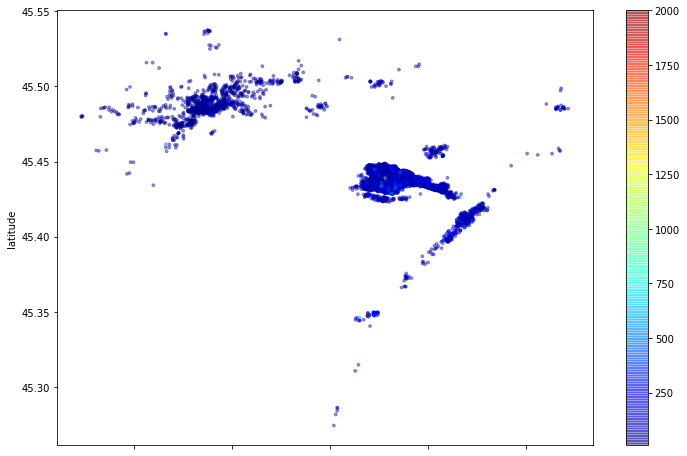

In [280]:
# imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));




**Número de noites em Veneza**

In [239]:
# média do minimo de noites
print('A média de estadia mínima em Veneza é de {} noites'.format(round(df_clean['minimum_nights'].median())))

A média de estadia mínima em Veneza é de 2 noites


## Conclusões
----
O objetivo principal desse projeto foi realizar uma análise inicial dos dados da empresa **Airbnb** para cidade de Veneza na Itália. O dataset utilizado consiste em uma versão simplificada dos dados das acomodações.

Nesse projeto foi necessário o tratamento dos dados, os quais apresentava valores ausentes e *outliers*, sendo necessária a exclusão de colunas e preenchimentos dos valores ausentes para algumas variáveis.

Com base na análise apresentada, foi possivél ver quais as regiões que possuem maior quantidade de acomodações, os tipos de acomodações disponivéis e o preço médio de cada região.

Como proposta futura, sugere-se que seja realizada a análise exploratória com o conjunto de dados completos contendo as principais cidades turísticas da Itália (Roma, Milão e Florença).